In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import configparser

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
MODE = 'cnl'
RUN_NAME = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
EXP_NAME = ['GC_SB', 'GC_SU', 'GC_MB', 'GC_MU', 'GC_LB', 'GC_LU']
#PRINT_SCR
#BALANCE_DATA
#TRAIN_SIZE
#TEST_SIZE


In [4]:
path = {}

stats = {}
tr_loss = {}
val_loss = {}

accuracies = {}
prcsn = {}
rcl = {}
f1 = {}
roc = {}

for run in RUN_NAME:
    root = 'results/'
    path[run] = root + MODE + '/' + run + '/'
    
    stats = pd.read_csv(path[run] + 'stats.txt', sep='\s+')
    tr_loss[run] = pd.read_csv(path[run] + 'tr_loss.txt', sep='\s+', header = None).values[0]
    val_loss[run] = pd.read_csv(path[run] + 'val_loss.txt', sep='\s+', header = None).values[0]
    
    accuracies[run] = stats['ACC'][0]
    prcsn[run] = stats['PREC'][0]
    rcl[run] = stats['RCL'][0]
    f1[run] = stats['F1'][0]
    roc[run] = stats['ROC'][0]   
    

In [5]:
print(accuracies.values())

dict_values([0.9305, 0.933, 0.9878, 0.992, 0.9946, 0.9916])


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


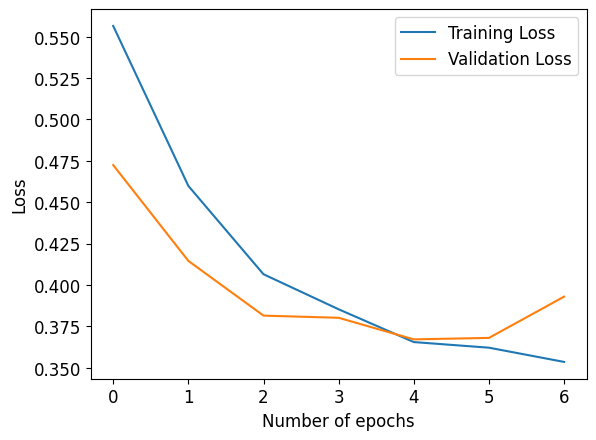

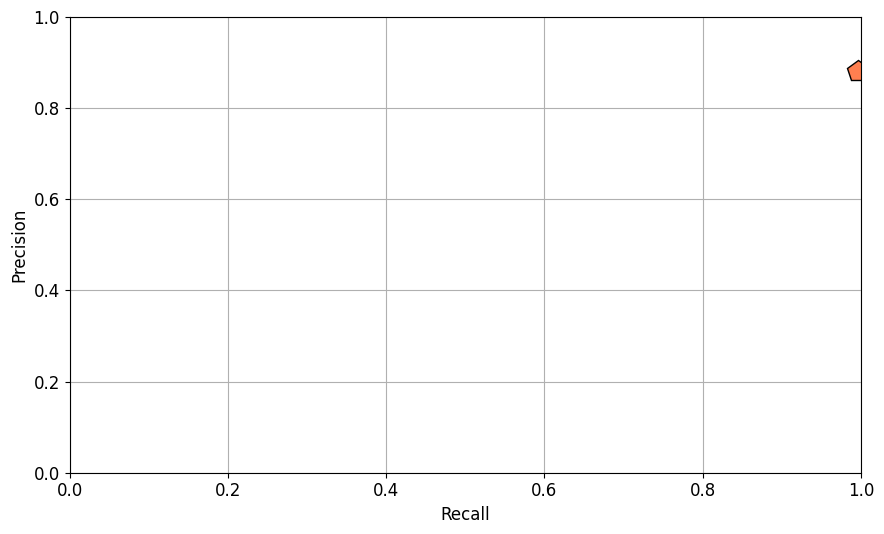

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


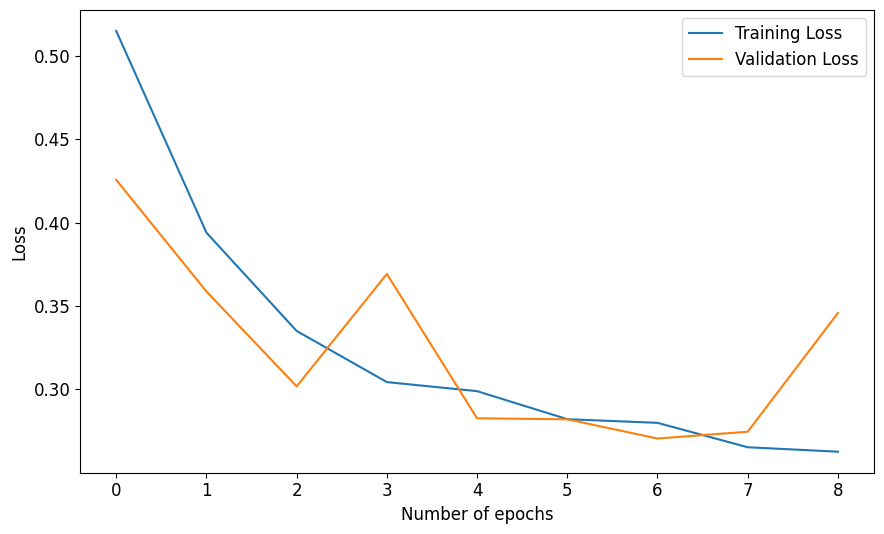

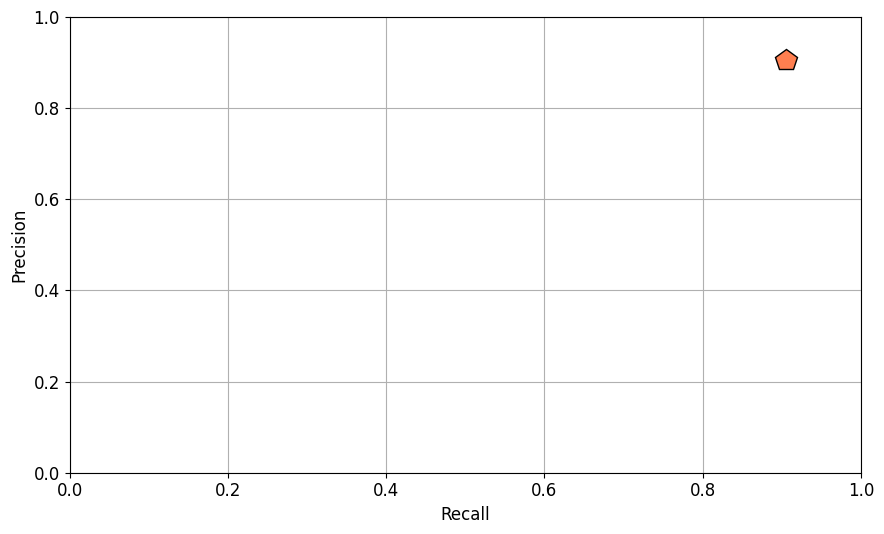

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


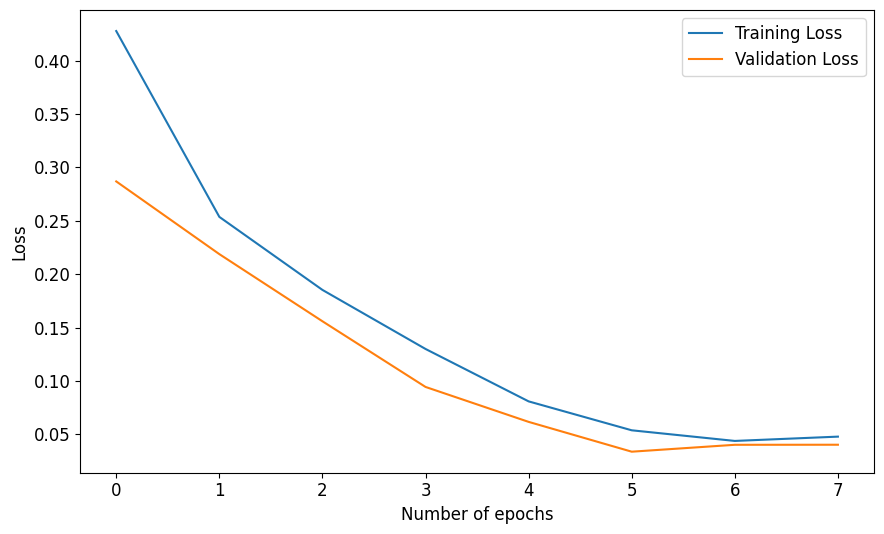

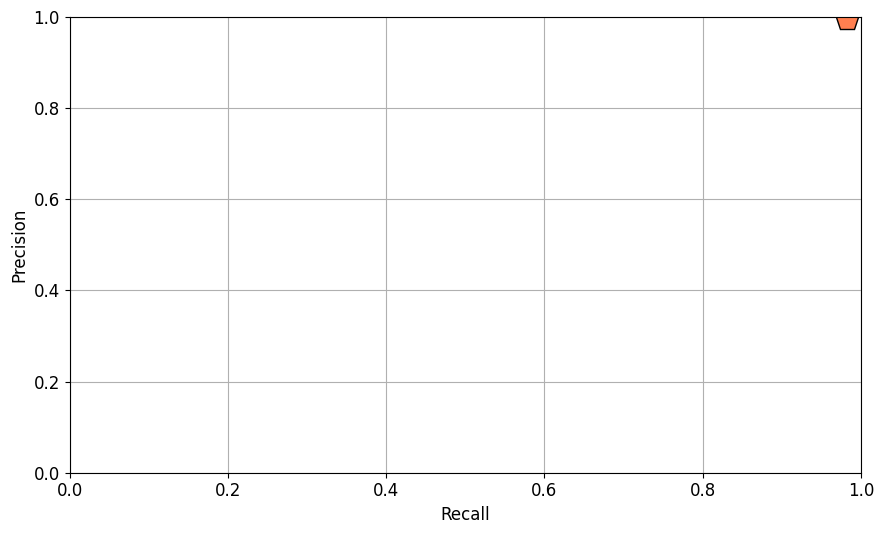

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


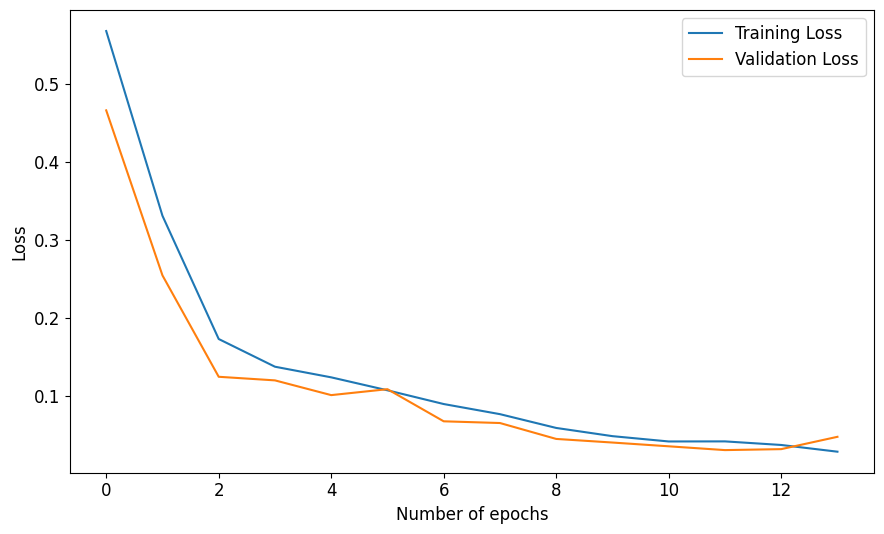

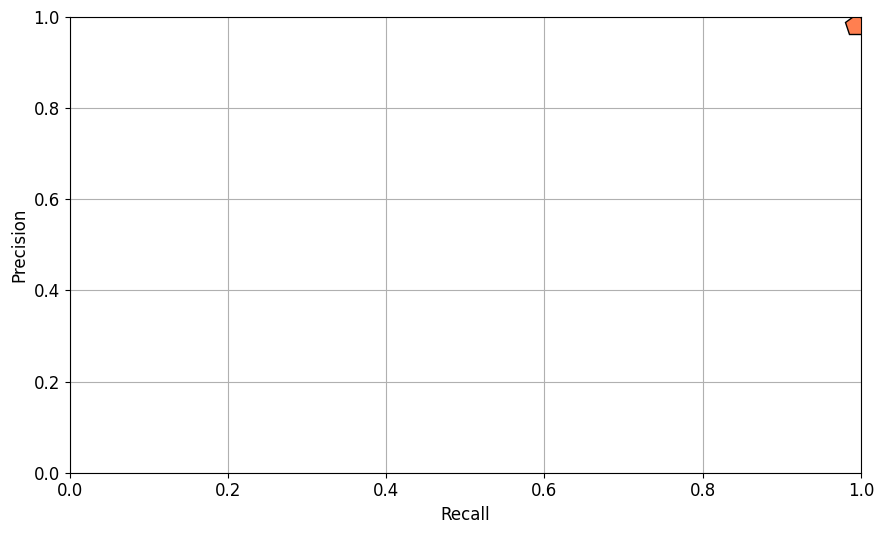

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


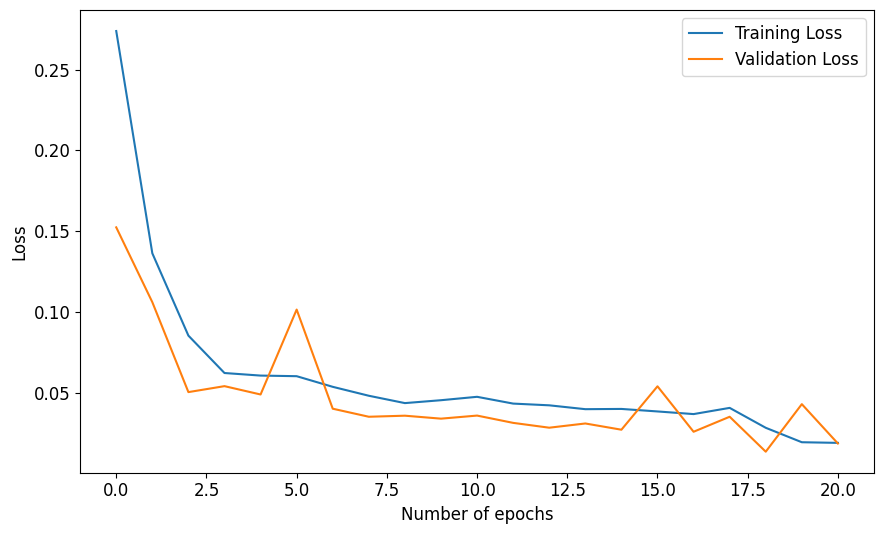

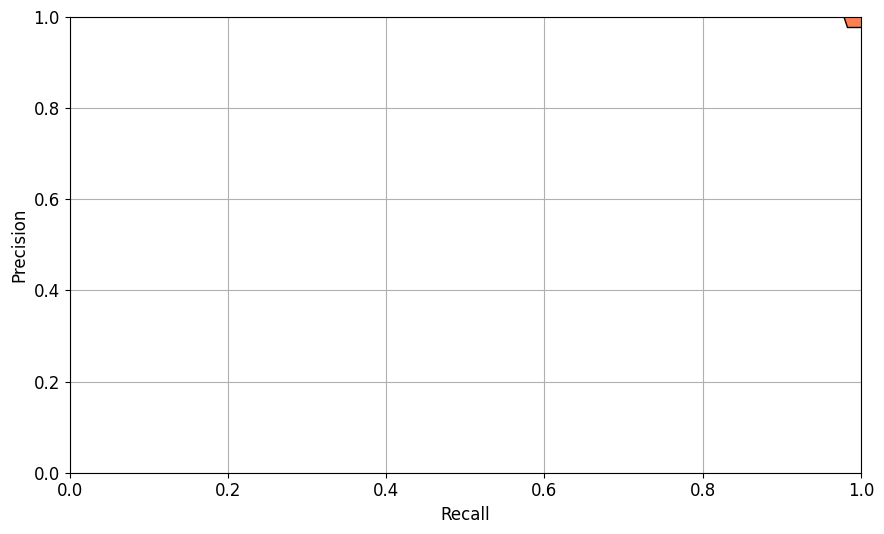

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


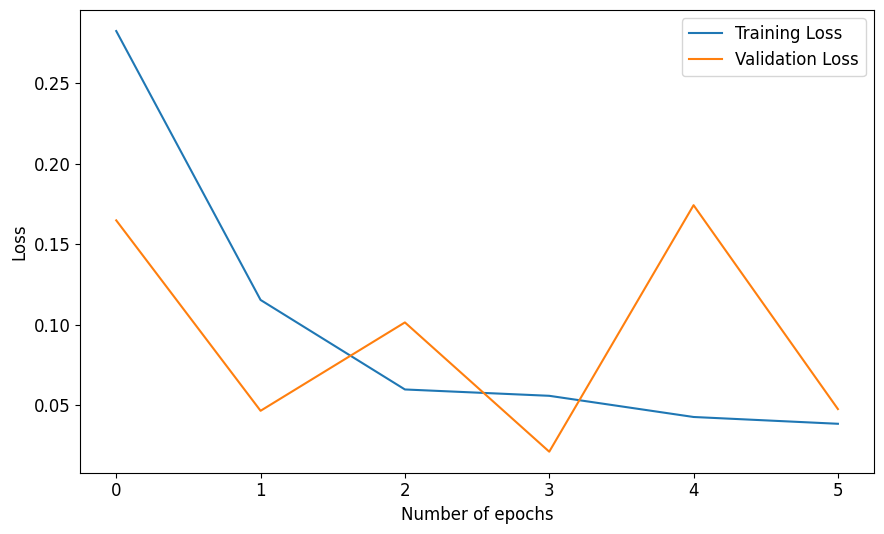

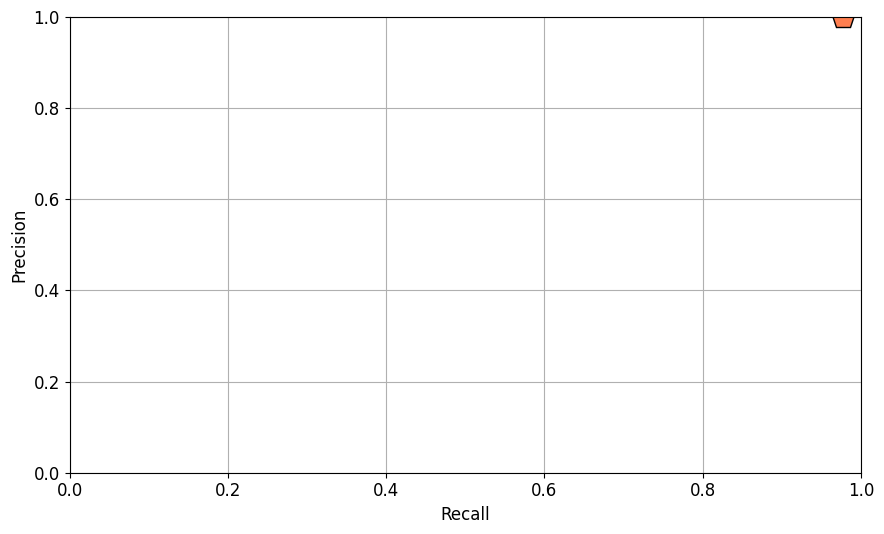

In [6]:
for run in RUN_NAME:
    '''PLOT LOSS'''
    plt.plot(tr_loss[run])
    plt.plot(val_loss[run])
    plt.legend(["Training Loss", "Validation Loss"])
    #plt.title('Model loss')
    plt.xlabel("Number of epochs")
    plt.ylabel("Loss")
    plt.savefig(path[run] + run + '_loss.eps', format='eps')
    plt.show()
    
    '''PLOT PR'''
    plt.rcParams["figure.figsize"] = [9.00, 5.50]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid()
    x = rcl[run]
    y = prcsn[run]
    plt.plot(x, y, marker="p", markersize=16, markeredgecolor="black", markerfacecolor="coral")
    #plt.title('Precision-Recall Space')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(path[run] + run + '_pr.eps', format='eps')
    plt.show()
    
    '''
    #PLOT ACCURACIES
    plt.bar(x = run, height=accuracies[run], log = True)
    plt.title('Accuracies in each node')
    plt.xlabel('Node ID')
    plt.ylabel('Accuracy')
    plt.savefig(path[run] + run + '_acc.eps', format='eps')
    plt.show()
    '''
    

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


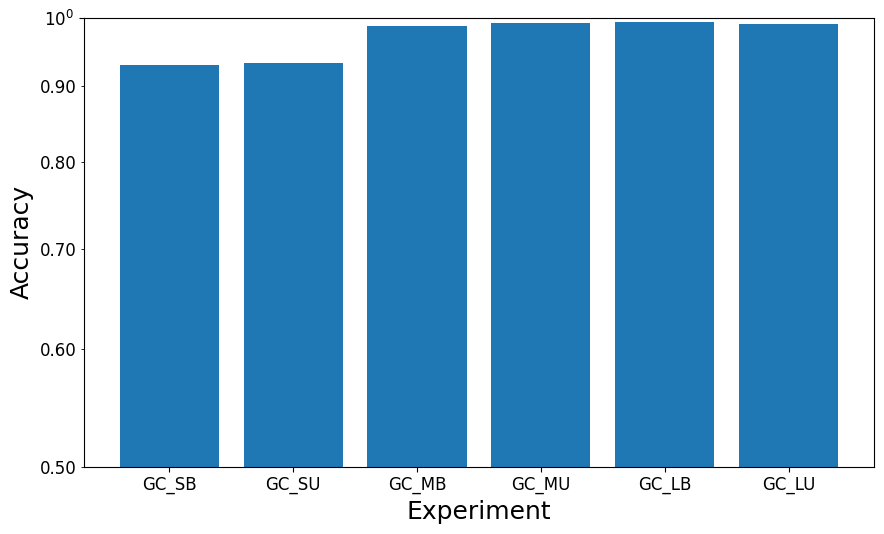

In [7]:
'''ACC'''
fig, ax = plt.subplots()

ax.bar(x = EXP_NAME, height=accuracies.values(), log = True)
#ax.set_title('Accuracy in each experiment')
ax.set_xlabel('Experiment', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.get_yaxis().set_minor_formatter(ticker.ScalarFormatter())
ax.get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_ylim(0.5,1)
plt.savefig('results/' + MODE + '/' + MODE + '_acc_summ.svg', format='svg')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; p

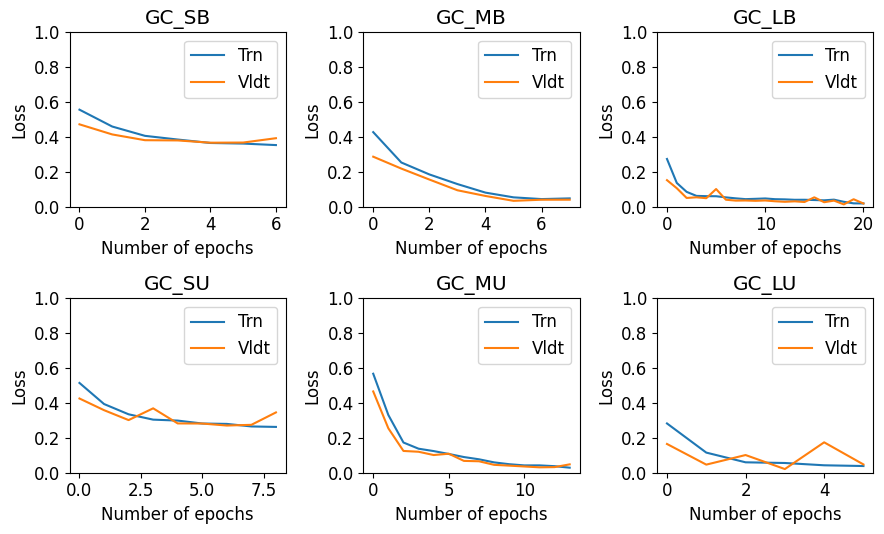

In [8]:
'''LOSSES'''

figure, axis = plt.subplots(2, 3)

'''PLOT 1'''
axis[0, 0].plot(tr_loss[RUN_NAME[0]])
axis[0, 0].plot(val_loss[RUN_NAME[0]])
axis[0, 0].legend(["Trn", "Vldt"], loc='upper right')
axis[0, 0].set_title(EXP_NAME[0])
axis[0, 0].set_xlabel("Number of epochs")
axis[0, 0].set_ylabel("Loss")
axis[0, 0].set_ylim(0,1)

'''PLOT 2'''
axis[1, 0].plot(tr_loss[RUN_NAME[1]])
axis[1, 0].plot(val_loss[RUN_NAME[1]])
axis[1, 0].legend(["Trn", "Vldt"], loc='upper right')
axis[1, 0].set_title(EXP_NAME[1])
axis[1, 0].set_xlabel("Number of epochs")
axis[1, 0].set_ylabel("Loss")
axis[1, 0].set_ylim(0,1)

'''PLOT 3'''
axis[0, 1].plot(tr_loss[RUN_NAME[2]])
axis[0, 1].plot(val_loss[RUN_NAME[2]])
axis[0, 1].legend(["Trn", "Vldt"], loc='upper right')
axis[0, 1].set_title(EXP_NAME[2])
axis[0, 1].set_xlabel("Number of epochs")
axis[0, 1].set_ylabel("Loss")
axis[0, 1].set_ylim(0,1)

'''PLOT 4'''
axis[1, 1].plot(tr_loss[RUN_NAME[3]])
axis[1, 1].plot(val_loss[RUN_NAME[3]])
axis[1, 1].legend(["Trn", "Vldt"], loc='upper right')
axis[1, 1].set_title(EXP_NAME[3])
axis[1, 1].set_xlabel("Number of epochs")
axis[1, 1].set_ylabel("Loss")
axis[1, 1].set_ylim(0,1)

'''PLOT 5'''
axis[0, 2].plot(tr_loss[RUN_NAME[4]])
axis[0, 2].plot(val_loss[RUN_NAME[4]])
axis[0, 2].legend(["Trn", "Vldt"], loc='upper right')
axis[0, 2].set_title(EXP_NAME[4])
axis[0, 2].set_xlabel("Number of epochs")
axis[0, 2].set_ylabel("Loss")
axis[0, 2].set_ylim(0,1)

'''PLOT 6'''
axis[1, 2].plot(tr_loss[RUN_NAME[5]])
axis[1, 2].plot(val_loss[RUN_NAME[5]])
axis[1, 2].legend(["Trn", "Vldt"], loc='upper right')
axis[1, 2].set_title(EXP_NAME[5])
axis[1, 2].set_xlabel("Number of epochs")
axis[1, 2].set_ylabel("Loss")
axis[1, 2].set_ylim(0,1)

#plt.suptitle('Train and Validation losses in ' + MODE.upper() + ' version')
plt.savefig('results/' + MODE + '/' + MODE + '_loss_grid.eps', format='eps')
plt.show()


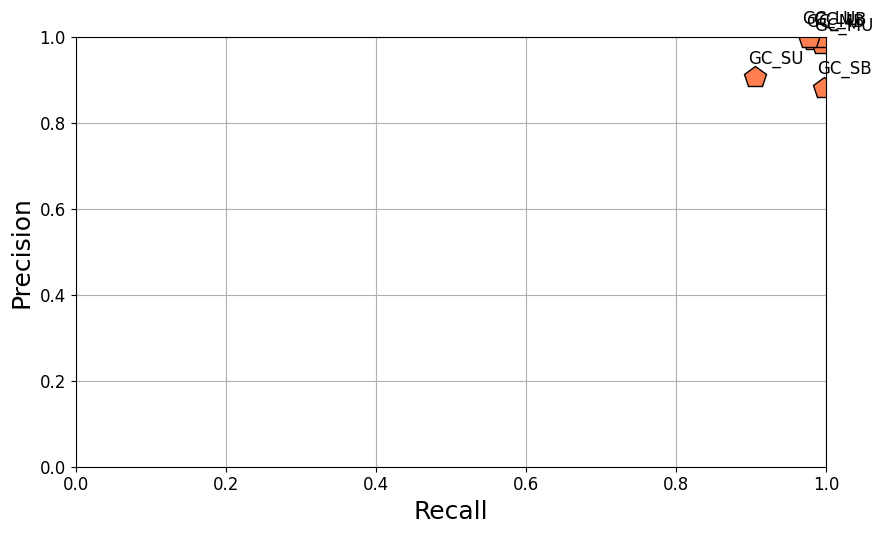

In [9]:
'''PR CURVE'''

figure, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid()
for i in RUN_NAME:
    x = rcl[i]
    y = prcsn[i]
    ax.plot(x, y, marker="p", markersize=16, markeredgecolor="black", markerfacecolor='coral')
#ax.set_title('Precision-Recall points in each ' + MODE + ' experiment')
ax.set_ylabel('Precision', fontsize=18)
ax.set_xlabel('Recall', fontsize=18)

for i, run in enumerate(RUN_NAME):
    ax.annotate(EXP_NAME[i], (rcl[run], prcsn[run]), xytext=(-5, 10), textcoords="offset points")
    
plt.savefig('results/' + MODE + '/' + MODE + '_pr_summ.eps', format='eps')
plt.show()
